<center>
  <img src="https://www.inteli.edu.br/wp-content/uploads/2022/04/28103439/Logo-Container.png" />
</center>

# `[SI10-2024-P1]` - Prova Prática

Sistemas de Informação - Módulo 10 - Turma 4



**Nome**: *Giovanna Furlan Torres*

## Contexto

Uma plataforma online, que atua na venda de produtos, deseja otimizar sua interface para melhorar a experiência do usuário e aumentar as taxas de conversão. Recentemente, a empresa implementou um redesign de sua página web, e os registros dessa mudança estão detalhados nos dados coletados desde então. As variáveis registradas diariamente incluem o número de visitantes únicos, sessões, taxa de rejeição, páginas por sessão, principais origens do tráfego, tipos de dispositivos usados, eventos ocorridos, taxa de conversão e o tempo médio de sessão.

Com base nesses dados, a empresa considera realizar uma mudança similar para otimizar ainda mais sua plataforma. Antes de proceder, a equipe deseja empregar simulações de Monte Carlo para avaliar os possíveis impactos de um novo redesign na taxa de conversão, tempo médio de sessão e taxa de rejeição, utilizando análises estatísticas para prever tendências futuras e ajustar estratégias de maneira informada. Essa abordagem visa garantir que as decisões tomadas maximizem as taxas de conversões, fundamentais para o sucesso contínuo da plataforma.

## Importação do dataset e das bibliotecas

In [57]:
# Importação do dataset
# https://drive.google.com/file/d/1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr/view?usp=drive_link
!gdown 1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr

Downloading...
From: https://drive.google.com/uc?id=1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr
To: /content/ITL-SI10-2024-P1-dataset.csv
100% 7.03k/7.03k [00:00<00:00, 14.4MB/s]


## Bibliotecas

In [124]:
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Importação dos dados

In [59]:
df = pd.read_csv('ITL-SI10-2024-P1-dataset.csv')
df

,Data,Visitantes Únicos,Sessões,Taxa de Rejeição (%),Páginas por Sessão,Principais Origens do Tráfego,Dispositivos,Eventos,Taxa de Conversão (%),Tempo Médio de Sessão (minutos)
0,2023-01-01,113.0,126.0,50.496714,1.834201,Direto,Desktop,8,1.952083,5.395516
1,2023-01-02,90.0,157.0,49.438007,1.955760,Social,Desktop,5,2.066180,4.680899
2,2023-01-03,92.0,185.0,49.800231,2.285052,Direto,Desktop,9,2.058858,5.972584
3,2023-01-04,130.0,206.0,50.251843,2.325464,Pago,Mobile,6,2.134617,4.705854
4,2023-01-05,123.0,155.0,48.070931,2.267006,Direto,Desktop,6,2.420236,5.835801
5,2023-01-06,148.0,191.0,47.647219,2.362449,Orgânico,Mobile,9,2.559353,6.773194
6,2023-01-07,150.0,197.0,49.036840,2.662313,Direto,Mobile,4,2.501274,5.318291
7,2023-01-08,146.0,202.0,47.801333,2.356262,Pago,Desktop,9,2.693574,5.666004
8,2023-01-09,137.0,284.0,46.140695,2.651792,Social,Desktop,2,2.714130,6.134571
9,2023-01-10,131.0,254.0,46.729001,2.569731,Social,Desktop,10,2.698200,5.968601


## Questões

### Questão 1

**Análise Exploratória de Dados**: Faça a exploração dos dados, utilizando gráficos interativos. Identifique correlações entre as variáveis e apresente essas relações em uma matriz de correlação focada nas variáveis mais relevantes para a conversão de vendas.

## Sumário Estatístico

O código abaixo é responsável por fornecer uma visão do tipo de cada coluna dentro do DataFrame.

In [60]:
df.dtypes

Data                                object
Visitantes Únicos                  float64
Sessões                            float64
Taxa de Rejeição (%)               float64
Páginas por Sessão                 float64
Principais Origens do Tráfego       object
Dispositivos                        object
Eventos                              int64
Taxa de Conversão (%)              float64
Tempo Médio de Sessão (minutos)    float64
dtype: object

O gráfico de linhas abaixo, mostra uma crescente referente a taxa de sessões ao longo dos dias nos meses de janeiro e fevereiro de 2023.

In [61]:
fig = px.line(df, x='Data', y='Sessões', title='Distribuição da Sessões ao Longo do Tempo')
fig.show()

Já ao observarmos a taxa de rejeição está decaindo ao longo dos meses o que é bom para a empresa.

In [62]:
fig = px.line(df, x='Data', y='Taxa de Rejeição (%)', title='Distribuição da Taxa de Rejeição ao Longo do Tempo')
fig.show()

Seguindo no mesmo raciocício, com a taxa de rejeição caindo, a conversão está aumentando ao longo dos dias.

In [63]:
fig = px.line(df, x='Data', y='Taxa de Conversão (%)', title='Distribuição da Taxa de Conversão (%) ao Longo do Tempo')
fig.show()

Por fim, os usuários estão mais engajados com o conteúdo mostrando um avanço do tempo logado na plataforma ao longo dos dias.

In [64]:
fig = px.line(df, x='Data', y='Tempo Médio de Sessão (minutos)', title='Distribuição do Tempo Médio de Sessão (minutos) ao Longo do Tempo')
fig.show()

Referente aos dispositivos utilizados para acessar o plataforma, o principal foco da empresa deve ser o desktop, onde concentra-se a maior parte dos seus usuários.

In [65]:
fig_devices = px.bar(df, x='Dispositivos', y='Visitantes Únicos', title='Distribuição dos Dispositivos')
fig_devices.show()

Já em relação a Tráfego a empresa apresenta um bom nível de recepção de clientes orgânicos.

In [66]:
fig_sources = px.bar(df, x='Principais Origens do Tráfego', y='Visitantes Únicos', title='Distribuição das Principais Origens do Tráfego por Mês')
fig_sources.show()

Complementando o gráfico acima, mostra qual tráfego foi mais utilizado ao longo dos dias

In [67]:
fig_sources_monthly = px.bar(df, x='Principais Origens do Tráfego', y='Visitantes Únicos', title='Distribuição das Principais Origens do Tráfego por Mês', color='Data',
                             labels={'Data':'Mês'}, category_orders={'Data': ['janeiro', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez']})
fig_sources_monthly.show()

## Matriz de Correlação

Apresenta-se a matriz de correlação com todas as variáveis numéricas do dataframe

In [93]:
correlation_data = df[['Visitantes Únicos','Sessões', 'Taxa de Rejeição (%)','Páginas por Sessão','Taxa de Conversão (%)', 'Tempo Médio de Sessão (minutos)']].corr()
correlation_data

,Visitantes Únicos,Sessões,Taxa de Rejeição (%),Páginas por Sessão,Taxa de Conversão (%),Tempo Médio de Sessão (minutos)
Visitantes Únicos,1.000000,0.965535,-0.960974,0.980164,0.984202,0.960822
Sessões,0.965535,1.000000,-0.968901,0.980749,0.983243,0.968905
Taxa de Rejeição (%),-0.960974,-0.968901,1.000000,-0.968120,-0.974824,-0.982036
Páginas por Sessão,0.980164,0.980749,-0.968120,1.000000,0.988983,0.960547
Taxa de Conversão (%),0.984202,0.983243,-0.974824,0.988983,1.000000,0.976846
Tempo Médio de Sessão (minutos),0.960822,0.968905,-0.982036,0.960547,0.976846,1.000000


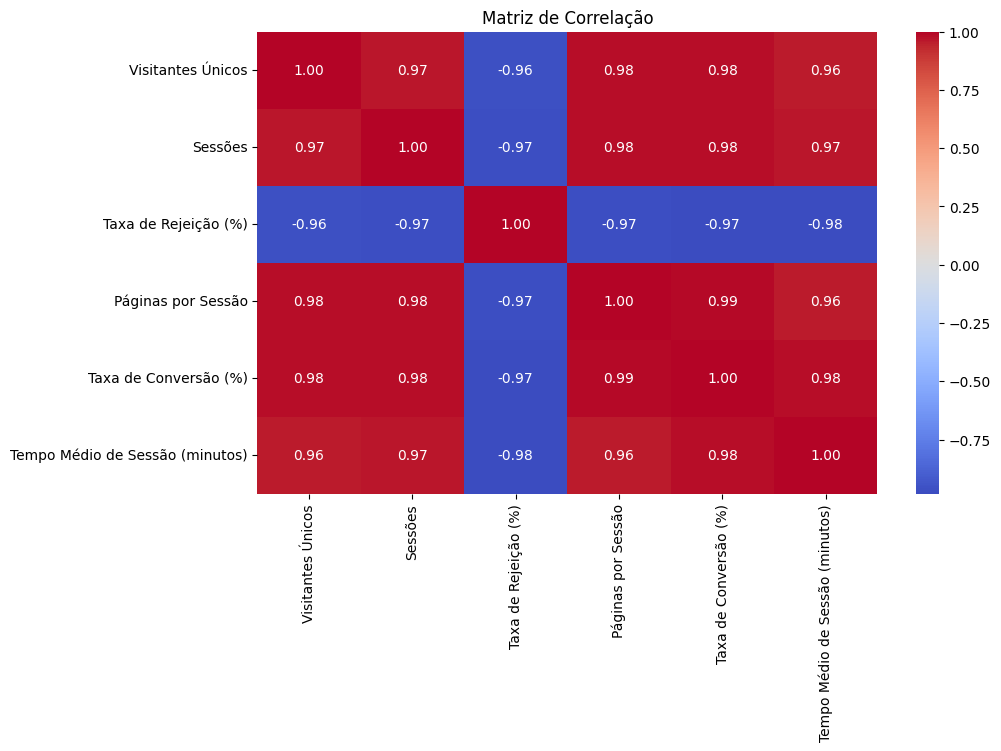

In [94]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

Apresenta-se a matriz de correlação levando em consideração as variáveis que serão utilizadas na simulação

In [96]:
correlation_data = df[['Sessões', 'Taxa de Rejeição (%)', 'Taxa de Conversão (%)', 'Tempo Médio de Sessão (minutos)']].corr()
correlation_data

,Sessões,Taxa de Rejeição (%),Taxa de Conversão (%),Tempo Médio de Sessão (minutos)
Sessões,1.000000,-0.968901,0.983243,0.968905
Taxa de Rejeição (%),-0.968901,1.000000,-0.974824,-0.982036
Taxa de Conversão (%),0.983243,-0.974824,1.000000,0.976846
Tempo Médio de Sessão (minutos),0.968905,-0.982036,0.976846,1.000000


In [97]:
correlation_data = df[['Sessões', 'Taxa de Rejeição (%)', 'Taxa de Conversão (%)', 'Tempo Médio de Sessão (minutos)']].corr()
fig_matrix = px.imshow(correlation_data, title='Matriz de Correlação')
fig_matrix.show()

### Questão 2

**Simulação de Monte Carlo**: Implemente uma simulação de Monte Carlo para avaliar os possíveis efeitos de um novo redesign na plataforma. Analise como diferentes variáveis podem impactar os resultados e discuta os cenários que esta simulação pode prever, ajudando a empresa a tomar decisões mais informadas sobre o redesign.

## Separação DF

Esta simulação, prevê a utilização das seguintes colunas para a análise :
- 'Sessões',
- 'Taxa de Rejeição (%)',
- 'Taxa de Conversão (%)',
- 'Tempo Médio de Sessão (minutos)'


Entende-se que essas colunas são as mais relevantes para a empresa conseguir  otimizar sua interface para melhorar a experiência do usuário e aumentar as taxas de conversão

In [68]:
df_simulacao = df[['Data','Sessões', 'Taxa de Rejeição (%)', 'Taxa de Conversão (%)', 'Tempo Médio de Sessão (minutos)']]

In [69]:
def novodf (df, inicio, fim, colunas):
    df['Data'] = pd.to_datetime(df['Data'])
    dados = df[(df['Data'] >= inicio) & (df['Data'] <= fim)]
    novo_df = dados[colunas]
    return novo_df

colunas = ['Data','Sessões', 'Taxa de Rejeição (%)', 'Taxa de Conversão (%)', 'Tempo Médio de Sessão (minutos)']

df1 = novodf (df_simulacao, '2023-01-01', '	2023-01-31', colunas)
df2 = novodf (df_simulacao, '2023-02-01', '2023-03-01', colunas)

<ipython-input-69-9849b7c51f59>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-69-9849b7c51f59>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Simulação Monte Carlo

Distribuição das variáveis utilizadas para a média e desvio padrão

In [73]:
media_antes_sessoes = df1['Sessões'].mean()
media_depois_sessoes = df2['Sessões'].mean()
std_antes_sessoes = df1['Sessões'].std()
std_depois_sessoes = df2['Sessões'].std()

media_antes_rejeicao = df1['Taxa de Rejeição (%)'].mean()
media_depois_rejeicao = df2['Taxa de Rejeição (%)'].mean()
std_antes_rejeicao = df1['Taxa de Rejeição (%)'].std()
std_depois_rejeicao = df2['Taxa de Rejeição (%)'].std()

media_antes_conversao = df1['Taxa de Conversão (%)'].mean()
media_depois_conversao = df2['Taxa de Conversão (%)'].mean()
std_antes_conversao = df1['Taxa de Conversão (%)'].std()
std_depois_conversao = df2['Taxa de Conversão (%)'].std()

media_antes_tempo_medio = df1['Tempo Médio de Sessão (minutos)'].mean()
media_depois_tempo_medio = df2['Tempo Médio de Sessão (minutos)'].mean()
std_antes_tempo_medio = df1['Tempo Médio de Sessão (minutos)'].std()
std_depois_tempo_medio = df2['Tempo Médio de Sessão (minutos)'].std()

Aplicação da simulação de Monte Carlo utilizando apenas 1 mudança na página - Redesign

In [74]:
def simulacao(numero_simulacoes):

    resultados_sessoes = []
    resultados_rejeicao = []
    resultados_conversao = []
    resultados_tempo_medio = []

    for _ in range(numero_simulacoes):

        mudanca1 = max(np.random.normal(0, 1), 0)

        ajuste_sessoes = media_depois_sessoes - media_antes_sessoes
        ajuste_rejeicao = media_depois_rejeicao - media_antes_rejeicao
        ajuste_conversao = media_depois_conversao - media_antes_conversao
        ajuste_tempo_medio = media_depois_tempo_medio - media_antes_tempo_medio

        nova_taxa_sessoes = np.abs(np.random.normal(media_antes_sessoes + ajuste_sessoes * mudanca1, std_depois_sessoes))
        nova_taxa_rejeicao = np.abs(np.random.normal(media_antes_rejeicao + ajuste_rejeicao * mudanca1, std_depois_rejeicao))
        nova_taxa_conversao = np.abs(np.random.normal(media_antes_conversao + ajuste_conversao * mudanca1, std_depois_conversao))
        nova_taxa_tempo_medio = np.abs(np.random.normal(media_antes_tempo_medio + ajuste_tempo_medio * mudanca1, std_depois_tempo_medio))

        nova_taxa_sessoes = (nova_taxa_sessoes * mudanca1)
        nova_taxa_rejeicao = (nova_taxa_rejeicao * mudanca1)
        nova_taxa_conversao = (nova_taxa_conversao * mudanca1)
        nova_taxa_tempo_medio = (nova_taxa_tempo_medio * mudanca1)

        resultados_sessoes.append(nova_taxa_sessoes)
        resultados_rejeicao.append(nova_taxa_rejeicao)
        resultados_conversao.append(nova_taxa_conversao)
        resultados_tempo_medio.append(nova_taxa_tempo_medio)

    return resultados_sessoes, resultados_rejeicao, resultados_conversao, resultados_tempo_medio

numero_simulacoes = 1000
resultados_sessoes_simulado, resultados_rejeicao_simulado, resultados_conversao_simulado, resultados_tempo_medio_simulado = simulacao(numero_simulacoes)

Criação de um dataframe com resultados

In [76]:
df_resultados = pd.DataFrame({
    'Sessões': resultados_sessoes_simulado,
    'Taxa de Rejeição (%)': resultados_rejeicao_simulado,
    'Taxa de Conversão (%)': resultados_conversao_simulado,
    'Tempo Médio de Sessão (minutos)': resultados_tempo_medio_simulado
})

## Resultado simulação

Ao analisar o resultado da simulação e compará-lo anterioremente, temos que:

- Redução da média de Sessões, após a mudanças as sessões do site caiu o que não é um retorno bom a empresa.

- Redução da média de Taxa de Rejeição, a taxa de rejeição caiu de 34% para 8% o que mostra uma boa aceitação dos usuários ao novo conteúdo.

- Redução da média de Taxa de Conversão, talvez a mudança foi eficaz em reter o usuário mas não em converte-lo, não sendo uma boa estratégia avançar com esse posicionamento.

- Redução da média de Tempo Médio de Sessão, outro ponto que gera preocuração, uma vez que o usuário está cada vez mais distante do site/serviço.

In [80]:
media = df_resultados.mean()

print("Média de Sessões após a mudança:", media['Sessões'])
print("Média de Taxa de Rejeição (%) após as mudanças:", media['Taxa de Rejeição (%)'])
print("Média de Taxa de Conversão (%) após as mudanças:", media['Taxa de Conversão (%)'])
print("Média de Tempo Médio de Sessão (minutos) após as mudanças:", media['Tempo Médio de Sessão (minutos)'])

Média de Sessões após a mudança: 275.4846437316241
Média de Taxa de Rejeição (%) após as mudanças: 8.293152196676154
Média de Taxa de Conversão (%) após as mudanças: 2.6003587025021853
Média de Tempo Médio de Sessão (minutos) após as mudanças: 6.045434421332517


In [98]:
media = df_simulacao.mean()

print("Média de Sessões antes a mudança:", media['Sessões'])
print("Média de Taxa de Rejeição (%) antes as mudanças:", media['Taxa de Rejeição (%)'])
print("Média de Taxa de Conversão (%) antes as mudanças:", media['Taxa de Conversão (%)'])
print("Média de Tempo Médio de Sessão (minutos) antes as mudanças:", media['Tempo Médio de Sessão (minutos)'])

Média de Sessões antes a mudança: 449.45
Média de Taxa de Rejeição (%) antes as mudanças: 34.230938537268486
Média de Taxa de Conversão (%) antes as mudanças: 4.499631657295852
Média de Tempo Médio de Sessão (minutos) antes as mudanças: 10.045957126518564


## Discussão

Impacto das diferentes variáveis nos resultados e como a simulação pode ajudar a empresa a tomar decisões mais informadas sobre o redesign.

Aplicar uma diversa quantidade de variáveis na simulação, possibilita estudar quais aspectos aquela mudança no site vai impactar positivamente ou negativamente, podendo-se testar antes de realmente aplicar aos usuários. Tal implementação, é benéfica a empresa pois auxilia em uma tomada de decisão baseada em dados, que podem ser otimizados e realizados de forma contínua, evitando gastos de dinheiro com campanhas e mudanças que podem não ocorrer da maneira prevista.

### Questão 3

**Análise de Sensibilidade**: Realize uma análise de sensibilidade para examinar como alterações em diferentes variáveis de entrada afetam as previsões da taxa de conversão.

Avaliando a análise de sentimento aplicada, tem-se que

RMSE: 0.17

Indica que, as previsões do modelo desviam do real em cerca de 0.17%. Este valor permite entender a média dos erros nas previsões do modelo, tendo o disvio padrão de 0.17% em torno dos valores reais.

MAE: 0.14

Indica que em 0.14% em média, as previsões erram por menos de 1% em relação aos valores reais.

CONCLUSÃO

O RMSE e o MAE estão próximos o que indica poucos erros grandes no modelo.

In [103]:
fig = px.scatter(
    df,
    x="Tempo Médio de Sessão (minutos)",
    y="Taxa de Conversão (%)",
    trendline="ols",
    title="Tempo de Sessão e Taxa de Conversão [Relação]",
    labels={"Tempo Médio de Sessão (minutos)": "Tempo Médio de Sessão (min)",
            "Taxa de Conversão (%)": "Taxa de Conversão (%)"}
)
fig.show()

In [115]:
X = df_simulacao.drop(["Data", "Taxa de Conversão (%)"], axis=1)
y = df_simulacao["Taxa de Conversão (%)"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
model = RandomForestRegressor(n_estimators=10000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {np.sqrt(mse):.2f}")
print(f"MAE: {mae:.2f}")

RMSE: 0.17
MAE: 0.14


In [120]:
simulacoes = 10
conversao = []

for _ in range(simulacoes):

    amostra = resample(X, n_samples=len(X), replace=True, random_state=None)
    conversao_prevista = model.predict(amostra)

    conversao.extend(conversao_prevista)

conversao_df = pd.DataFrame(conversao, columns=['Taxa de Conversão Prevista (%)'])
estatisticas_df = conversao_df.describe()

In [123]:
fig = px.histogram(conversao_df, x='Taxa de Conversão Prevista (%)',
                   title='Distribuição da Taxa de Conversão Prevista')

fig.update_layout(
    xaxis_title='Taxa de Conversão (%)',
    yaxis_title='Contagem',
)
fig.show()